<a href="https://www.kaggle.com/code/muhammadasifwazir/mnist-cnn-basics?scriptVersionId=196587534" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Q1:why we do not fix the filter values which can give us better results for that speacific problem.

reason: we want the Model to learn the better or to make model gernalized


Q2: what if we have negative values in our filter and we want use the Relu activation fuction. so the relu will discord all the negative values which can results in to information loss.

Reason: Relu work as Hyperparameter we can replace with some other activation function, if we do not get the good results.

Q2: how to check overfitting and underfitting

overfitting: we can check through model test and train accuracy

Underfitting: we can check through our model taining accuracy 

**Modified National Institute of Standards and Technology**

- **Optical Character Recognition** (OCR)

In [1]:
from keras.datasets import mnist

**LOADING DATASET**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Visualizing the Dataset

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape 
# we have 60000 images in the Train set and each image shape is 28*28

(60000, 28, 28)

In [5]:
x_test.shape
# we have 10000 images in the Test set and each image shape is 28*28

(10000, 28, 28)

In [6]:
#[2] is the index number of the image in the train set
single_img = x_train[2]
#single_img

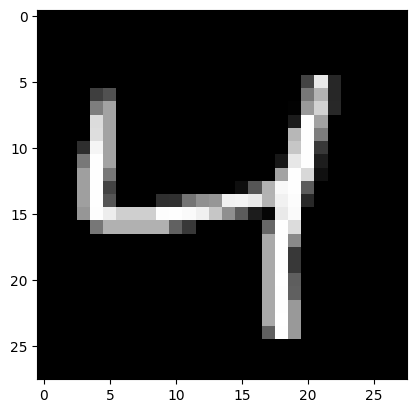

In [7]:
plt.imshow(single_img, cmap = 'gray')
# the actual image is in gray color but due to plt library we get color image
# 28*28 (Gray color and has no channel)
# 28*28*3 (Has 3 channel RGB)

# **Pre-Processing Data**
- **Labels**

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**one Hot Encoding**

- if we give the whole array to the model then it consider as regression problem, so takel this issue we use One Hot encoding
- one Hot Encoding : So that our model understands that we have a classification problem

- [0,0,0,0,0,0,0,0,0,0]
- [0,0,0,0,0,1,0,0,0,0]  One Hot encodeing
- [0,1,2,3,4,5,6,7,8,9]

In [10]:

from tensorflow.keras.utils import to_categorical


In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
# we define the categorical number that is 10
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_cat_train = to_categorical(y_train, 10)

# **Precessing the X Data**

In [16]:
single_img.max()

255

- Why we divide by 255 because we have to normalize instead of using standard scalar
- benifite of doing this is we want to reduce the computational cost
- their will be no effect on image because the data characteristic remain constant

In [17]:
x_train = x_train/255

In [18]:
x_test = x_test/255

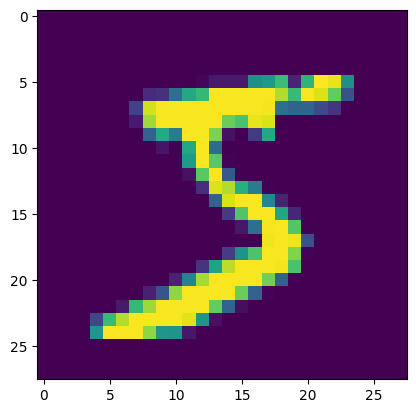

In [19]:
scaled_img = x_train[0]
plt.imshow(scaled_img)

# **Reshaping the Data**

- we have to add the color channel in gray scaled image to avoid the "one Rank Error".
- one Rank error = [6000;]
- occurance after falten layer when we apply dense layer then we can face the one rank array

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

# **Start Building a CNN**

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=12, kernel_size = (3,3), input_shape = (28,28,1), activation='relu'))

# MaxPooling
model.add(MaxPool2D(pool_size= (2,2)))

# Flatten Layer
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

# OutPut Layer
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2028)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       259,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,122 (1020.01 KB)

 Trainable params: 261,122 (1020.01 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_cat_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9044 - loss: 0.3240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9806 - loss: 0.0636
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9881 - loss: 0.0425
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9910 - loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9937 - loss: 0.0205


# **Evaluate The Model**

In [29]:
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0493


[0.04203924536705017, 0.987500011920929]

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
predictions[2]

array([2.16771605e-06, 9.99763727e-01, 8.61397268e-07, 6.65250965e-09,
       1.22012316e-04, 2.99550578e-07, 3.19080158e-07, 3.33384378e-05,
       7.25053251e-05, 4.72372221e-06], dtype=float32)

In [33]:
import numpy as np

predicted_classes = np.argmax(predictions, axis=1)

In [34]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
report = classification_report(y_test, predicted_classes)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

